In [2]:
#首先 import 必要的模块
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#color = sns.color_palette()

%matplotlib inline

In [3]:
train = pd.read_csv("../data1/train.csv")
train.head() #读取数据并查看前五行

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
print("Train :", train.shape)#读取训练数据，并查看特征维数

Train : (7377418, 6)


In [5]:
#查看数据基本信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


7377418个样本，5个特征1个标签列

In [7]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


### 查看样本中为0数量

In [9]:
dtype=["msno","song_id","source_system_tab","source_screen_name","source_type","target"]
print((train[dtype] == 0).sum())

msno                        0
song_id                     0
source_system_tab           0
source_screen_name          0
source_type                 0
target                3662762
dtype: int64


我们可以看到为0的值特征列没有，标签数据用户没有续订的样本数有3662762

### 查看样本缺省值

In [12]:
for i in dtype:
    print(i,'缺省值数：',len(train[pd.isna(train[i])==True]))

msno 缺省值数： 0
song_id 缺省值数： 0
source_system_tab 缺省值数： 24849
source_screen_name 缺省值数： 414804
source_type 缺省值数： 21539
target 缺省值数： 0


数据中source_system_tab，source_screen_name和source_type各有24849,414804和21539个缺省值

### 计算用户数、音乐数目

In [15]:
n_users = train['msno'].unique().shape[0]
n_items = train['song_id'].unique().shape[0]
print ('Number of users = ' + str(n_users) + '\n'+ 'Number of music = ' + str(n_items) )

Number of users = 30755
Number of music = 359966


有用户数为30755，音乐数量为359966

### 计算用户以及歌曲的订阅次数

In [20]:
# 统计每部电影的评分人数，可看出电影的流行程度，默认是降序排列
train_clicked = train[train['target']==1]
user_freq =train_clicked['msno'].value_counts() 
item_freq =train_clicked['song_id'].value_counts()
user_freq

o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    3288
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    2818
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    2791
MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    2069
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    1978
4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=    1814
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    1806
uCDJmSDTzA5PpnYGqKvNmFbwBIoS3jIXFbO5YfoCv/Y=    1794
1wiu2UfN0BNhHfPTrDS3S/rQkX/vnwDoKH6ODTUdH9k=    1737
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    1735
7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=    1715
HVcWdf8CEo9s6qwt5V7TpoPYJfRlQSTA6b7kxEAImpc=    1710
mDJCU+fKu/mbdk9l4SmPYiJwpeMyK44o9wmG1X3735A=    1607
V39VxDdE9SgMQZnX58oQChm9W056pw2lC3TiifMfkKw=    1602
LThaiVqGGnVTPmTcmwN/LLo4fVb5dzkduzd7s1SgzIA=    1578
EZmIP7zKgqKwpEHnuDjRIkzCmcLNlHn4hkiglZ5LxK8=    1539
00qmlWC3H/cjf2Ig1li5xIO0VNDRgBX0f9ilouDBEZs=    1533
x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=    1503
K7obY5lUlZTd6a/byE9NG/e7Q/dlgHfppLbYk8OL7os=  

可以看到最活跃的用户连续订阅了 3288次，而不活跃的用户即订阅为1次的用户也存在

In [26]:
item_freq

reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    10885
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    10556
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=     9808
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=     9411
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=     9004
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=     8787
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=     8780
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=     8403
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=     8112
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=     7903
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=     7725
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=     7608
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=     7224
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=     7061
DLBDZhOoW7zd7GBV99bi92ZXYUS26lzV+jJKbHshP5c=     6901
v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=     6879
p/yR06j/RQ2J6yGCFL0K+1R06OeG+eXcwxRgOHDo/Tk=     6536
Xpjwi8UAE2Vv9PZ6cZnhc58MCtl3cKZEO1sdAkqJ4mo=     6399
OaEbZ6TJ1NePtNUeEgWsvFLeopkS

最受欢迎的歌曲被订阅了 10885，但是很多歌曲都只被订阅了1次或者没有，拖尾性严重

Text(0,0.5,'Number of occurrences')

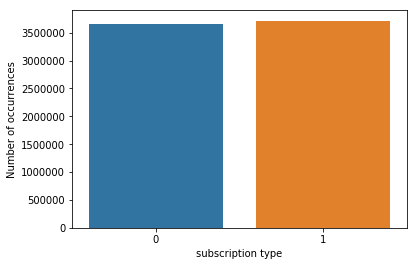

In [29]:
#查看target订阅情况
sns.countplot(train['target'])
plt.xlabel('subscription type')
plt.ylabel('Number of occurrences')

从图中可以看出继续订阅和停止订阅的数量差不多

In [39]:
# 统计每首歌曲的订阅次数，可看出歌曲的流行程度，默认是降序排列
item_freq =train_clicked['song_id'].value_counts()
#item_freq.head()

df_items_sorted_by_item_freq = pd.DataFrame({'song_id':item_freq.index, 'rating_times':item_freq})
df_items_sorted_by_item_freq.head()

,song_id,rating_times
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,10885
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,10556
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,9808
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,9411
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,9004


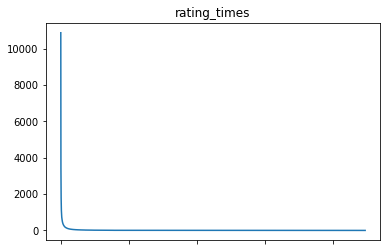

In [40]:
#按订阅次数排列
item_freq1 = item_freq.copy()
item_freq.index = range(item_freq1.count()) # 对索引重新赋值，方便画图
fig, ax = plt.subplots(1, 1)
item_freq1.plot(ax=ax, title='rating_times');

从图中可以看出，歌曲订阅两级分化严重，订阅次数为0、1与其他值的分化较大。

In [45]:
df_songs=pd.read_csv('../data1/songs.csv')
df_songs_extra=pd.read_csv('../data1/song_extra_info.csv')
df_songs1=pd.merge(df_songs, df_songs_extra, how='left', left_on='song_id', right_on='song_id')
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [46]:
# 根据频次大小依次取歌曲信息
df_items_sorted_by_item_freq_merge = pd.merge(df_items_sorted_by_item_freq, df_songs1, how='left', left_on='song_id', right_on='song_id')
df_items_sorted_by_item_freq_merge['ranking_rating_times']=range(item_freq.count()) # 加上排名,数字越小，排在越前面

df_items_sorted_by_item_freq_merge.head()

,song_id,rating_times,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,ranking_rating_times
0,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,10885,219324.0,458,周湯豪 (NICKTHEREAL),周湯豪,周湯豪\崔惟楷,3.0,帥到分手,TWAG11600306,0
1,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,10556,215144.0,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0,告白氣球,TWK971601308,1
2,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,9808,287328.0,458,Eric 周興哲,Eric Chou,Eric Chou| Yi-Wei Wu,3.0,你，好不好？ (How Have You Been?),TWA471602002,2
3,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,9411,265508.0,465,田馥甄 (Hebe),JerryC,徐世珍/吳輝福,3.0,小幸運 (A little happiness),TWD951562101,3
4,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,9004,227343.0,465,謝和弦 (R-chord),R-chord,R-chord,3.0,謝謝妳愛我 (Thanks For Your Love),TWA531657203,4


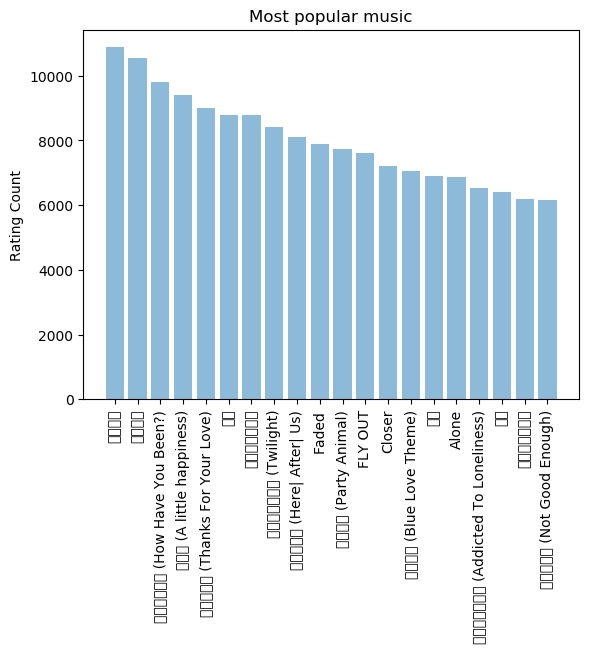

In [47]:
# 前二十大流行歌曲
popular_items_count_top_20 = df_items_sorted_by_item_freq_merge.iloc[0:20]['rating_times']
popular_items_top_20_titles =  df_items_sorted_by_item_freq_merge.iloc[0:20]['name']

objects = (list(popular_items_top_20_titles))
y_pos = np.arange(len(objects))
performance = list(popular_items_count_top_20)
 
plt.rcdefaults()    
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Rating Count')
plt.title('Most popular music')
 
plt.show()

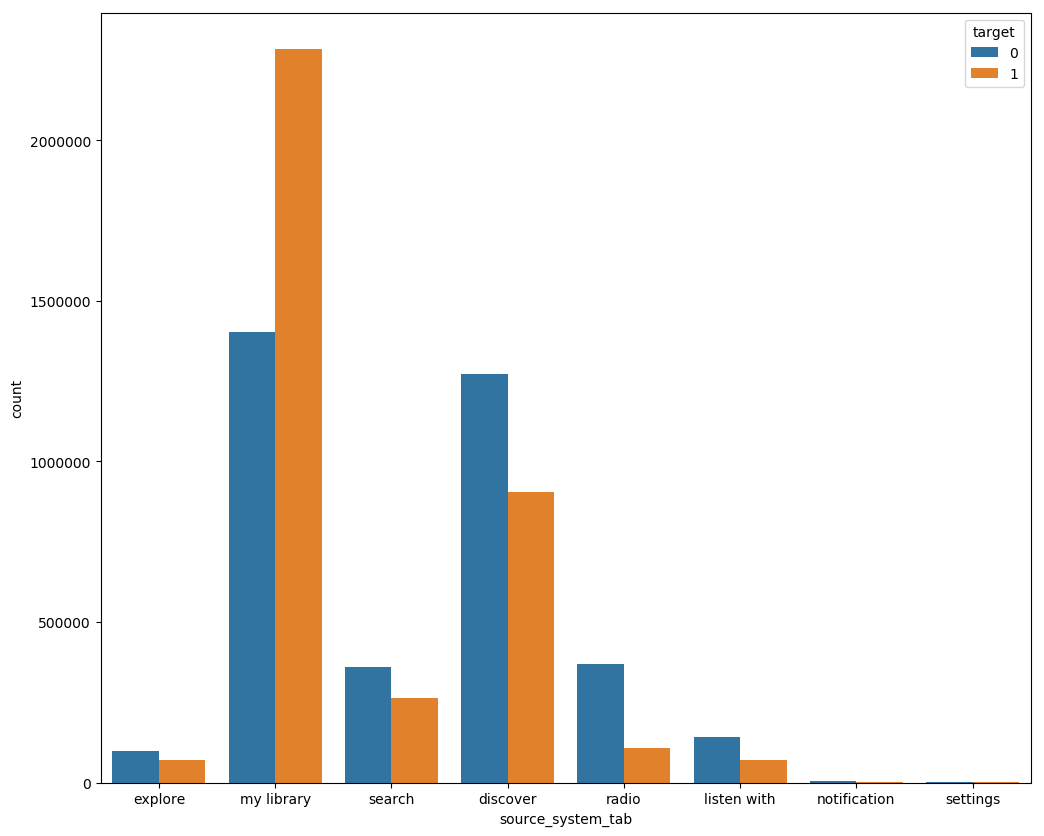

In [49]:
#查看事件触发类型
plt.figure(figsize=(12,10))
sns.countplot(train['source_system_tab'],hue=train['target'])
#plt.show()

[Text(0,0,'online-playlist'),
 Text(0,0,'local-playlist'),
 Text(0,0,'local-library'),
 Text(0,0,'top-hits-for-artist'),
 Text(0,0,'album'),
 Text(0,0,'song-based-playlist'),
 Text(0,0,'radio'),
 Text(0,0,'song'),
 Text(0,0,'listen-with'),
 Text(0,0,'artist'),
 Text(0,0,'topic-article-playlist'),
 Text(0,0,'my-daily-playlist')]

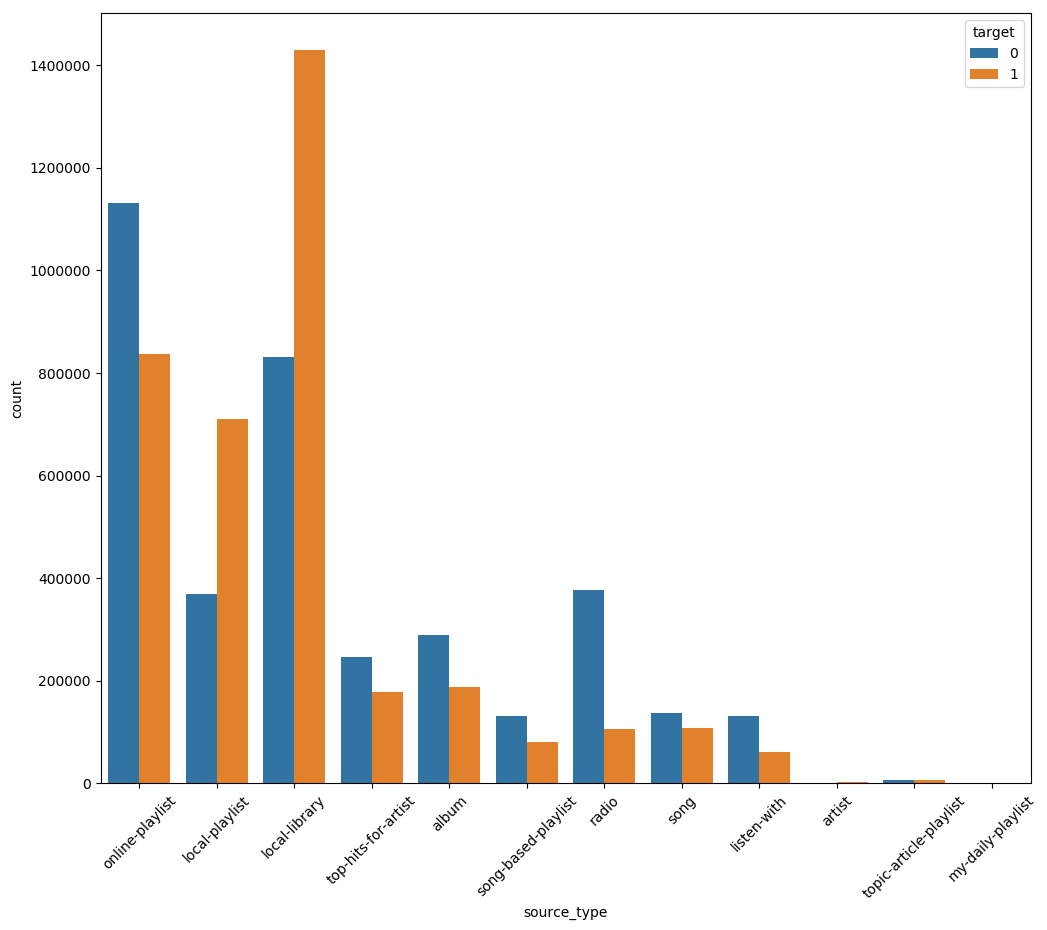

In [50]:
#查看音乐入口类型
plt.figure(figsize=(12,10))
g=sns.countplot(train['source_type'],hue=train['target'])
locs,labels=plt.xticks()
g.set_xticklabels(labels,rotation=45)
#plt.show()

In [52]:
#将触发事件、播放音乐入口的类型改为category
train['source_system_tab']=train['source_system_tab'].astype('category')
train['source_type']=train['source_type'].astype('category')